In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os


c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [2]:
data = pd.read_csv('../dataset/dataset_malwares.csv')

In [3]:
data.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [4]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

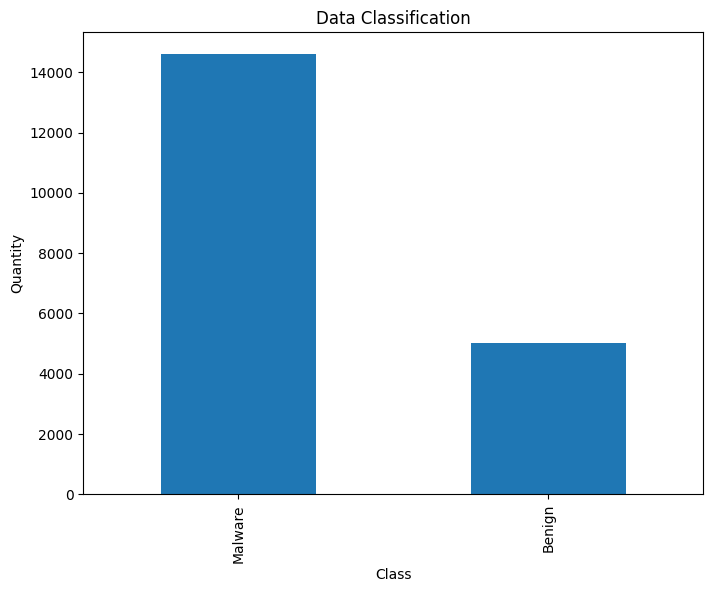

In [5]:
plt.figure(figsize=(8, 6))
data['Malware'].value_counts().plot.bar()
plt.xticks([1, 0], ['Benign', 'Malware'])
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.title('Data Classification')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [7]:
data.head(10)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
5,VirusShare_eff7676f69be2b519f3424def92d3590,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,8,96,0,0,53248,69632,0,664744
6,VirusShare_e76cac211258723745f66bd9f9e29590,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,3,74,0,0,45140,61440,0,314368
7,VirusShare_cef6cdf0e85303a461f67f19ffcc2ddf,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,8,96,0,0,53248,69632,0,476984
8,VirusShare_59af5dfb0c79537eedd3326abde3c857,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,14,329,16,533872,526528,643072,0,930128
9,VirusShare_fda0add9d9a8c18c67a758ec2898d976,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,3,41,0,0,13024,20480,0,327680


In [8]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [9]:
X_train.head(10)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
17996,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,0,0,0,0,0,49152,0,38912
15684,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,9492,16384,0,0
7091,23117,80,2,0,4,15,65535,0,184,0,...,3758096512,0,6,11,0,0,1173284,1146880,0,586240
5374,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,59,0,0,48292,57344,0,0
174,23117,80,2,0,4,15,65535,0,184,0,...,3791650912,0,1,4,0,0,61652,61440,0,0
15404,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,76,116,104992,115016,118784,0,0
19051,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,3,40,5,24816,41304,45056,36864,0
13812,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,8,158,0,0,29604,180224,0,0
12041,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,2,0,0,64640,229376,0,0
657,23117,80,2,0,4,15,65535,0,184,0,...,3221225536,0,11,114,0,0,65536,86016,0,2426800


In [10]:
y_train.head(10)

17996    0
15684    0
7091     1
5374     1
174      1
15404    0
19051    0
13812    1
12041    1
657      1
Name: Malware, dtype: int64

In [14]:
X_test.head(10)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
15239,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,27,327,144,1239456,1272592,1290240,1257472,0
7960,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,2,65,0,0,328916,475136,0,479744
14732,23117,144,3,0,4,0,65535,0,184,0,...,1073741888,0,0,0,0,0,0,4096,0,0
8851,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,98,0,0,132260,159744,0,443392
15855,23117,144,3,0,4,0,65535,0,184,0,...,1073741888,0,0,0,0,0,0,4096,0,0
3231,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,148,0,0,135432,188416,180224,0
13699,23117,144,3,0,4,0,65535,0,184,0,...,3758096384,0,8,155,0,0,17076,24576,0,0
16313,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,413412,417792,0,0
3860,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,3,41,0,0,13024,20480,0,327680
18580,23117,144,3,0,4,0,65535,0,184,0,...,1610612768,0,1,1,0,0,10276,16384,0,5120


In [15]:
y_test.head(10)

15239    0
7960     1
14732    0
8851     1
15855    0
3231     1
13699    1
16313    0
3860     1
18580    0
Name: Malware, dtype: int64

In [27]:
#Building a machine learning model using the Random Forest algorithm
'''Explanation of the parameters
- n_estimators: This is the number of decision trees in the random forest model. In this case, we set the value to 100, meaning that we will create a random forest with 100 decision trees.
- random_state: This is the seed used to initialize randomness in the model. When we set the same random_state value, the model will produce consistent random results across different runs.
- oob_score: This is a boolean parameter (True or False). When set to oob_score=True, the model will calculate the Out-of-Bag (oob) score, which is an evaluation metric based on the data points not used during the decision tree construction. OOB score can be used to evaluate the model's performance without the need to split the data into separate training and testing sets.
- max_depth: This is the maximum depth of the decision trees in the random forest. If the max_depth value is set, the decision trees in the forest will not have a depth greater than this value. In this case, we set max_depth=16.
'''

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components = 10  # Adjust the number of components as needed

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rfc = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, max_depth=16)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\tree.py:163: Depr

Random Forest Classifier Accuracy: 0.9859801172572011
Random Forest Classifier F1-Score: 0.981429290105964
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



Text(50.722222222222214, 0.5, 'True Labels')

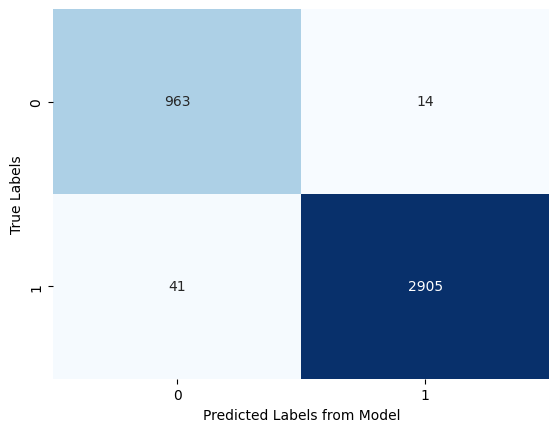

In [21]:
from sklearn.metrics import classification_report, f1_score
# Print classification report and confusion matrix for Random Forest Classifier
rfc_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malware'])
rfc_accuracy = np.mean(y_pred == y_test)
rfc_f1_score = np.mean(f1_score(y_test, y_pred, average=None))
print(f"Random Forest Classifier Accuracy: {rfc_accuracy}")
print(f"Random Forest Classifier F1-Score: {rfc_f1_score}")
print(rfc_report)
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted Labels from Model')
ax.set_ylabel('True Labels')

In [23]:
y_pred1 = rfc.predict(X_test.head(10))
pd.DataFrame({'y': y_test.head(10), 'y_pred': y_pred1})

c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


,y,y_pred
15239,0,0
7960,1,1
14732,0,0
8851,1,1
15855,0,0
3231,1,1
13699,1,1
16313,0,0
3860,1,1
18580,0,0


In [26]:
rfc_filename = "../components2/rf_model.pkl"
with open(rfc_filename, 'wb') as file:
    pickle.dump(rfc, file)

c:\Users\Tonmo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Text(0.5, 1.0, 'Features importance')

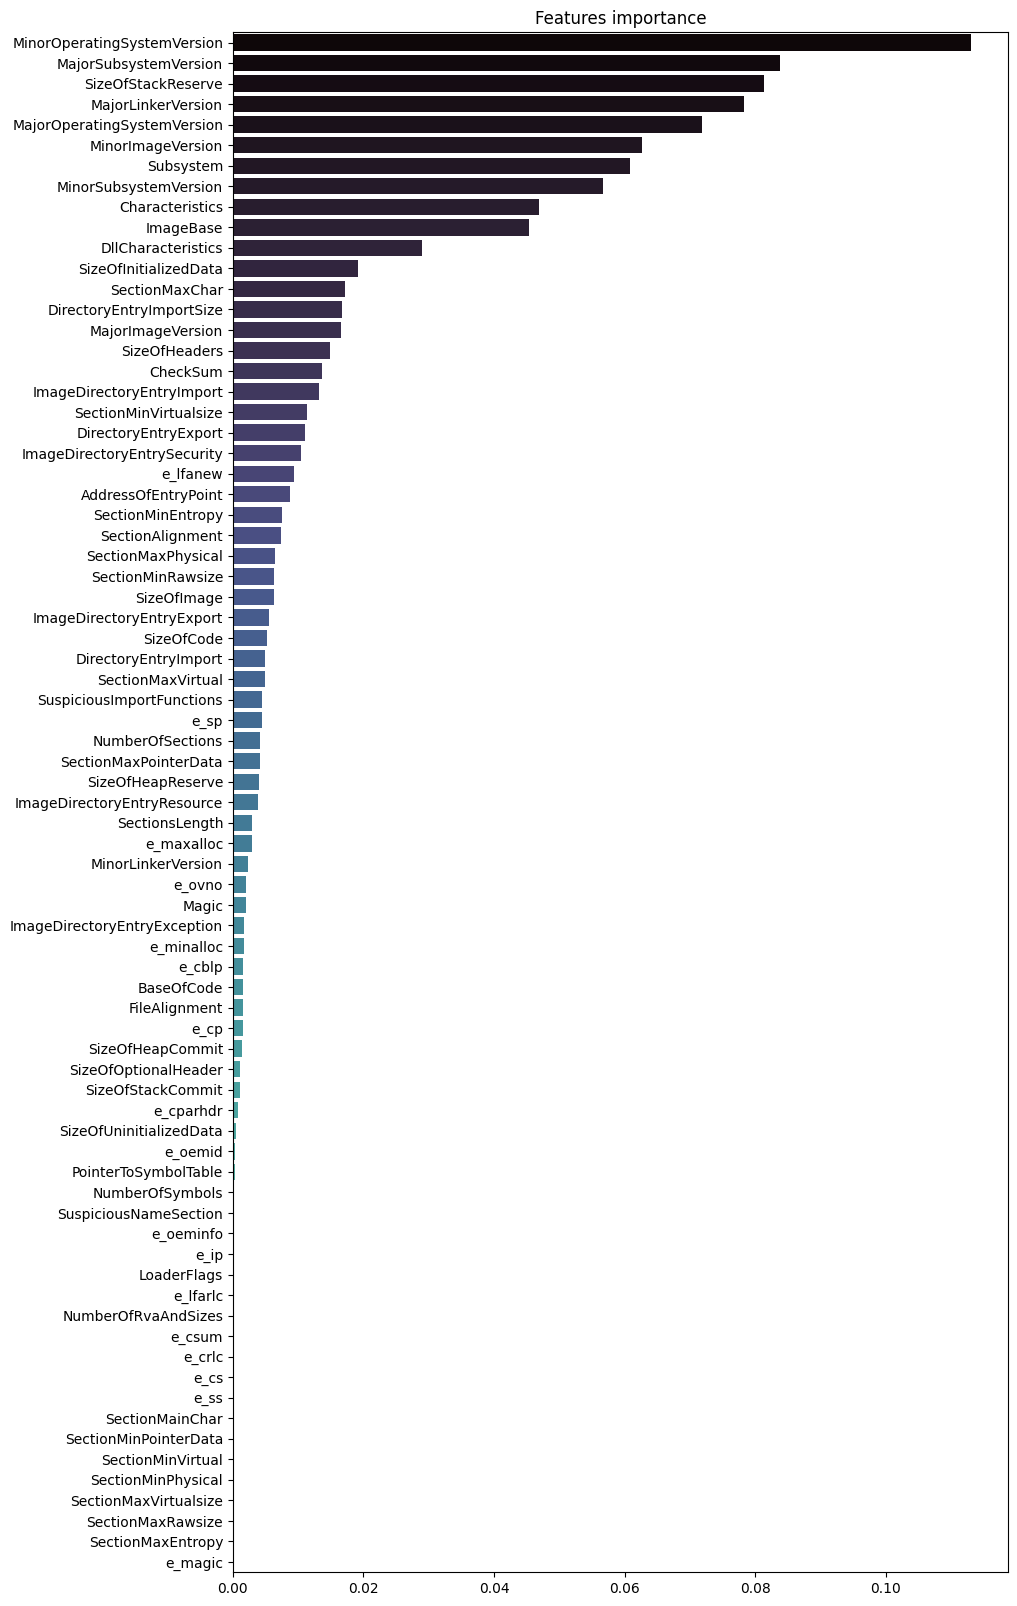

In [25]:
importance = rfc.feature_importances_
importance_dict = {used_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')